In [8]:
import pandas as pd
import matplotlib as plt

igralci = pd.read_csv("podatki_csv")
igralci.index = igralci.index+1
igralci.head(100)


,Ime,Igre,Minute,Tocke,FGM,FGA,FG%,3P,3PA,3P%,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFG%,TS%
1,LeBron James,1421,54092,38652,14152,28044,50.5,2261,6563,34.5,...,73.5,1666,9001,10667,10420,2186,1073,4966,54.5,58.8
2,Kareem Abdul-Jabbar,1560,57446,38387,15837,28307,55.9,1,18,5.6,...,72.1,2975,9394,17440,5660,1160,3189,2527,55.9,59.2
3,Karl Malone,1476,54852,36928,13528,26210,51.6,85,310,27.4,...,74.2,3562,11406,14968,5248,2085,1145,4524,51.8,57.7
4,Kobe Bryant,1346,48643,33643,11719,26200,44.7,1827,5546,32.9,...,83.7,1499,5548,7047,6306,1944,640,4010,48.2,55.0
5,Michael Jordan,1072,41010,32292,12192,24537,49.7,581,1778,32.7,...,83.5,1668,5004,6672,5633,2514,893,2924,50.9,56.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Jeff Malone,905,29660,17231,7099,14674,48.4,86,321,26.8,...,87.1,572,1792,2364,2154,577,100,1538,48.7,53.3
97,Chris Bosh,893,31936,17189,6209,12581,49.4,305,910,33.5,...,79.9,1927,5665,7592,1795,730,932,1807,50.6,57.1
98,Chris Webber,831,30852,17182,7192,15024,47.9,264,883,29.9,...,64.9,2271,5853,8124,3526,1197,1200,2313,48.7,51.3
99,Grant Hill,1026,34778,17137,6345,13126,48.3,219,697,31.4,...,76.9,1176,4993,6169,4252,1248,576,2459,49.2,55.1


In [9]:
#oglejmo si najbolj učinkovite strelce glede na njihove igrane minute
igralci["razmerje_minut"] = igralci["Tocke"] / igralci["Minute"]
igralci["razmerje_iger"] = igralci["Tocke"] / igralci["Igre"]
#ker točke na minuto ne povejo veliko, želimo pogledati točke na 48 minut, in to primerjati s točkami na igro(igrana igra se šteje tudi, če igralec le za minuto vstopi na igrišče)
urejena_po_razmerju = igralci.sort_values(by="razmerje_minut", ascending=False)
urejena_po_razmerju = urejena_po_razmerju[["Ime","Igre" ,"Minute", "Tocke", "razmerje_minut", "razmerje_iger"]]
urejena_po_razmerju = urejena_po_razmerju[igralci["Minute"]>10000]
#Oglejmo si le igralci, ki so preigrali več kot 10 000 minut.
urejena_po_razmerju["razmerje_minut"] = urejena_po_razmerju["razmerje_minut"]*48
#razmerje sedaj predstavlja število košov na 48 minut. Poglejmo razliko med tem razmerjem in "število košev na igro"



urejena_po_razmerju.head(20)


C:\Users\anzeg\AppData\Local\Temp\ipykernel_12812\50865897.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  urejena_po_razmerju = urejena_po_razmerju[igralci["Minute"]>10000]


,Ime,Igre,Minute,Tocke,razmerje_minut,razmerje_iger
349,Joel Embiid,394,12523,10718,41.081530,27.203046
453,Luka Doncic,330,11319,9100,38.589981,27.575758
5,Michael Jordan,1072,41010,32292,37.796050,30.123134
45,George Gervin,791,26536,20708,37.457944,26.179520
461,Trae Young,353,11941,8990,36.137677,25.467422
13,Kevin Durant,986,36181,26892,35.676626,27.273834
383,Donovan Mitchell,413,14069,10156,34.649797,24.590799
38,Stephen Curry,882,30303,21712,34.391842,24.616780
1,LeBron James,1421,54092,38652,34.298898,27.200563
25,James Harden,1000,34752,24693,34.106354,24.693000


Opazimo, da je razmerje minut bistveno višje od razmerja iger. To je najverjetneje vzrok tega, da igralci v večini ne igrajo celih 48 minut, pač pa se ponavadi zamenjani za konzervacijo energije

In [10]:
#Ko smo že omenili stamino, si oglejmo igralce, kateri počivajo najmanj na tekmo. Gledali bomo torej razmerje med minutami in tekmami*48. To število bo predstavljalo delež igre, ki ga igralec v povprečju preigra na tekmi
igralci["procenti_tekme"] = round(igralci["Minute"] / (igralci["Igre"]*48), 4)
urejena_po_procentih = igralci.sort_values(by = "procenti_tekme", ascending=False)
urejena_po_procentih = urejena_po_procentih[["Ime","Igre","Minute", "procenti_tekme"]]
urejena_po_procentih = urejena_po_procentih[igralci["Minute"]>10000]
urejena_po_procentih.head(20)


C:\Users\anzeg\AppData\Local\Temp\ipykernel_12812\2494806119.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  urejena_po_procentih = urejena_po_procentih[igralci["Minute"]>10000]


,Ime,Igre,Minute,procenti_tekme
7,Wilt Chamberlain,1045,47859,0.9541
165,Bill Russell,963,40726,0.8811
14,Oscar Robertson,1040,43886,0.8791
28,Allen Iverson,914,37582,0.8566
33,Elgin Baylor,846,33863,0.8339
23,Jerry West,932,36571,0.8175
182,Jerry Lucas,829,32131,0.8075
43,Bob Pettit,792,30690,0.8073
103,Latrell Sprewell,913,35268,0.8048
203,Dave Cowens,766,29565,0.8041


In [11]:
#sedaj si oglejmo najboljše podajače v NBA

igralci["Podaje_na_igro"] = round(igralci["AST"] / igralci["Igre"],2)
tabela_podajarcev = igralci.sort_values(by = "Podaje_na_igro", ascending=False)
tabela_podajarcev = tabela_podajarcev[["Ime", "Igre","AST","Podaje_na_igro"]]
tabela_podajarcev = tabela_podajarcev[igralci["Minute"]>10000]
tabela_podajarcev.head(20)

C:\Users\anzeg\AppData\Local\Temp\ipykernel_12812\1220043265.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tabela_podajarcev = tabela_podajarcev[igralci["Minute"]>10000]


,Ime,Igre,AST,Podaje_na_igro
84,Magic Johnson,906,10141,11.19
51,John Stockton,1504,15806,10.51
14,Oscar Robertson,1040,9887,9.51
37,Chris Paul,1214,11501,9.47
461,Trae Young,353,3285,9.31
68,Isiah Thomas,979,9061,9.26
215,Kevin Johnson,735,6711,9.13
271,John Wall,647,5735,8.86
89,Jason Kidd,1391,12091,8.69
91,Steve Nash,1217,10335,8.49


AttributeError: 'tuple' object has no attribute 'xlabel'

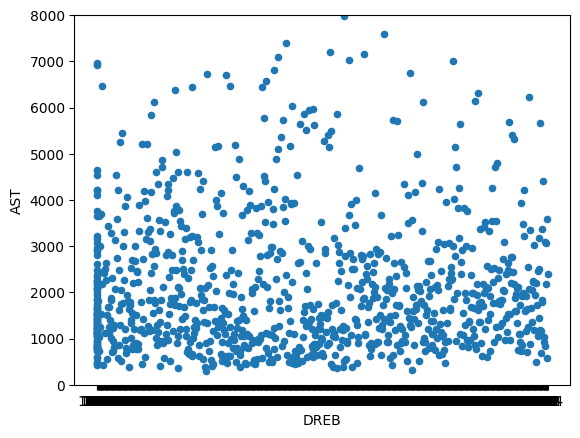

In [15]:
#poskusimo sedaj najti neko negativno korelacijo. Denimo, da bosta število asistenc in število skokov v obrambi v negativni korelaciji. Preverimo to za prvih 100 igralcev.
prvih_100 = igralci.head(1000)
prvih_100 = prvih_100.sort_values(by="DREB", ascending=True)
prvih_100.plot.scatter(x="DREB", y="AST").set_ylim(0,8000).xlabel("")


Očitno tu ni bilo dosežena nobena korelacija. Oglejmo si še korelacijo med obrambnimi skoki in ukradenimi žogami. Ker nekateri igralci nimajo zapisa za ukradene žoge, jih bo bilo treba izključiti


C:\Users\anzeg\AppData\Local\Temp\ipykernel_12812\3208601768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obrambni_brez_napak["DREB"] = obrambni_brez_napak["DREB"].astype(float)
C:\Users\anzeg\AppData\Local\Temp\ipykernel_12812\3208601768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obrambni_brez_napak["STL"] = obrambni_brez_napak["STL"].astype(float)
C:\Users\anzeg\AppData\Local\Temp\ipykernel_12812\3208601768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

(0.0, 9.0)

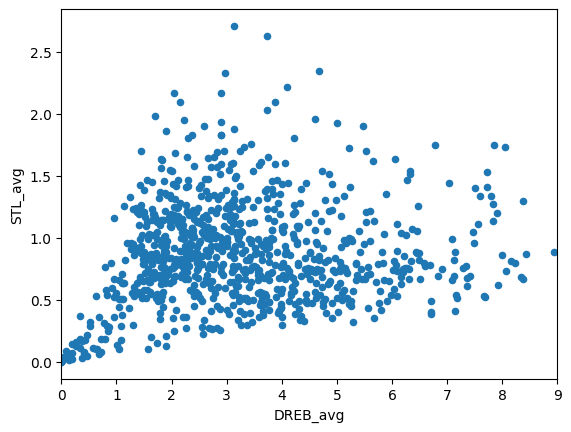

In [13]:
obrambni_brez_napak = igralci[(igralci["STL"] != "-") & (igralci["DREB"] != "-")]
obrambni_brez_napak["DREB"] = obrambni_brez_napak["DREB"].astype(float)
obrambni_brez_napak["STL"] = obrambni_brez_napak["STL"].astype(float)
obrambni_brez_napak["DREB_avg"] = obrambni_brez_napak["DREB"] / obrambni_brez_napak["Igre"]
obrambni_brez_napak["STL_avg"] = obrambni_brez_napak["STL"] / obrambni_brez_napak["Igre"]
obrambni_brez_napak["STL_avg"] = obrambni_brez_napak["STL_avg"].astype(float)
obrambni_brez_napak["DREB_avg"] = obrambni_brez_napak["DREB_avg"].astype(float)
obrambni_brez_napak = obrambni_brez_napak.sort_values(by="DREB_avg", ascending=False).head(1000)
#obrambni_brez_napak = obrambni_brez_napak.sort_values(by="DREB_avg", ascending=True)
obrambni_brez_napak.plot.scatter(x="DREB_avg", y="STL_avg").set_xlim(0,9)



Tu lahko opazimo neko pozitivno korelacijo. Torej defenzivni igralci so tisti, ki imajo več defenzivnih skokov in tudi več ukradenih žog. Poskusimo zavrniti/odobriti hipotezo, da igralci, ki so boljši v obrambi, zadevajo manj košev.

C:\Users\anzeg\AppData\Local\Temp\ipykernel_12812\1634821194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  igralci_brez_napak["STL"] = igralci_brez_napak["STL"].astype(float)
C:\Users\anzeg\AppData\Local\Temp\ipykernel_12812\1634821194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  igralci_brez_napak["DREB"] = igralci_brez_napak["DREB"].astype(float)
C:\Users\anzeg\AppData\Local\Temp\ipykernel_12812\1634821194.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

<Axes: xlabel='povprecno_defense', ylabel='tocke_na_igro'>

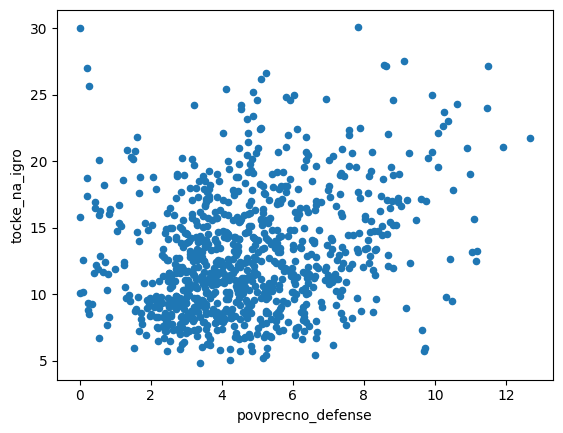

In [14]:
#Razdelimo igralce v tabelo, kjer gledamo njihove povprečne (bloke+skoke v obrambi + ukradene žoge) na igro
igralci_brez_napak = igralci[(igralci["STL"] != "-") & (igralci["DREB"] != "-") & (igralci["BLK"] != "-")]
igralci_brez_napak["STL"] = igralci_brez_napak["STL"].astype(float)
igralci_brez_napak["DREB"] = igralci_brez_napak["DREB"].astype(float)
igralci_brez_napak["BLK"] = igralci_brez_napak["BLK"].astype(float)
igralci_brez_napak["povprecno_defense"] = (igralci_brez_napak["BLK"] + igralci_brez_napak["DREB"] + igralci_brez_napak["STL"])/igralci_brez_napak["Igre"]
igralci_brez_napak = igralci_brez_napak.sort_values(by="povprecno_defense", ascending=False).head(1000)
igralci_brez_napak = igralci_brez_napak.sort_values(by = "povprecno_defense",ascending = True)
igralci_brez_napak["tocke_na_igro"] = igralci_brez_napak["Tocke"] / igralci_brez_napak["Igre"]
igralci_brez_napak.plot.scatter(x="povprecno_defense", y = "tocke_na_igro")




Hipotezo smo zavrnili. Lahko sledi da v košarki igralci ki so boljši v napadu, tudi prevladujejo v obrambi(ali pa je tu statistike skokov v obrambi prevladala).
